#dataset

In [1]:
import pandas as pd

df = pd.read_csv("https://github.com/k4ilham/Sentimen-Analisis-TFIDF-dan-KNN/raw/main/archive/dataset.csv", encoding='latin1')
df = df[['date','userName','text']]
df.head()

,date,userName,text
0,2024/04/29 10:16:56,ngui_sintan,Timnas kali ini semua cogan semua ya ????????
1,2024/04/29 12:28:06,agustiyaindahsariputri,Timnas Indonesia U-19 vs pra PON
2,2024/04/29 13:21:02,shaunevans_reff,????
3,2024/04/29 14:36:48,dslsyabildumps_,uhuyyyy????
4,2024/04/29 14:57:33,rohadiiiiiii,Final : waalykumsalam ????


#pre processing

##remove Duplicate

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      789 non-null    object
 1   userName  789 non-null    object
 2   text      788 non-null    object
dtypes: object(3)
memory usage: 18.6+ KB


In [3]:
df.drop_duplicates(subset="text",keep="first", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 788
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      564 non-null    object
 1   userName  564 non-null    object
 2   text      563 non-null    object
dtypes: object(3)
memory usage: 17.6+ KB


##case folding

In [4]:
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

df['case_folding'] = df['text'].apply(case_folding)

df.head(50)

,date,userName,text,case_folding
0,2024/04/29 10:16:56,ngui_sintan,Timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya ????????
1,2024/04/29 12:28:06,agustiyaindahsariputri,Timnas Indonesia U-19 vs pra PON,timnas indonesia u-19 vs pra pon
2,2024/04/29 13:21:02,shaunevans_reff,????,????
3,2024/04/29 14:36:48,dslsyabildumps_,uhuyyyy????,uhuyyyy????
4,2024/04/29 14:57:33,rohadiiiiiii,Final : waalykumsalam ????,final : waalykumsalam ????
5,2024/04/29 16:31:02,ayunabilaaaaa,beyond proud???,beyond proud???
6,2024/04/29 17:34:24,rezha_halo,Bismillah..??????????????,bismillah..??????????????
7,2024/04/29 17:38:30,ratdawiiii,????????,????????
8,2024/04/29 17:39:28,iqbal_fadilah30,???????? Gas indonesia,???????? gas indonesia
9,2024/04/29 18:45:45,ttiiiiii___,??????????????,??????????????


##cleansing

In [5]:
import re
import pandas as pd

def remove_URL(tweet):
    if not isinstance(tweet, str):
        return tweet
    url = re.compile(r'https?://\S+|www\S+')
    return url.sub(r'', tweet)

def remove_html(tweet):
    if not isinstance(tweet, str):
        return tweet
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)

def remove_emoji(tweet):
    if not isinstance(tweet, str):
        return tweet
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_numbers(tweet):
    if not isinstance(tweet, str):
        return tweet
    return re.sub(r'\d+', '', tweet)

def remove_symbols(tweet):
    if not isinstance(tweet, str):
        return tweet
    return re.sub(r'[^a-zA-Z0-9\s]', '', tweet)

def remove_username(tweet):
    if not isinstance(tweet, str):
        return tweet
    return re.sub(r'@[A-Za-z0-9_]+', ' ', tweet)

# Assuming 'df' is your DataFrame and 'case_folding' is the column you want to clean
df['cleansing'] = df['case_folding'].apply(lambda x: remove_URL(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_html(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_emoji(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_numbers(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_username(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_symbols(x))


df.head(50)


,date,userName,text,case_folding,cleansing
0,2024/04/29 10:16:56,ngui_sintan,Timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya
1,2024/04/29 12:28:06,agustiyaindahsariputri,Timnas Indonesia U-19 vs pra PON,timnas indonesia u-19 vs pra pon,timnas indonesia u vs pra pon
2,2024/04/29 13:21:02,shaunevans_reff,????,????,
3,2024/04/29 14:36:48,dslsyabildumps_,uhuyyyy????,uhuyyyy????,uhuyyyy
4,2024/04/29 14:57:33,rohadiiiiiii,Final : waalykumsalam ????,final : waalykumsalam ????,final waalykumsalam
5,2024/04/29 16:31:02,ayunabilaaaaa,beyond proud???,beyond proud???,beyond proud
6,2024/04/29 17:34:24,rezha_halo,Bismillah..??????????????,bismillah..??????????????,bismillah
7,2024/04/29 17:38:30,ratdawiiii,????????,????????,
8,2024/04/29 17:39:28,iqbal_fadilah30,???????? Gas indonesia,???????? gas indonesia,gas indonesia
9,2024/04/29 18:45:45,ttiiiiii___,??????????????,??????????????,


In [6]:
df = df[df['cleansing'].str.strip() != '']
df.head(50)

,date,userName,text,case_folding,cleansing
0,2024/04/29 10:16:56,ngui_sintan,Timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya
1,2024/04/29 12:28:06,agustiyaindahsariputri,Timnas Indonesia U-19 vs pra PON,timnas indonesia u-19 vs pra pon,timnas indonesia u vs pra pon
3,2024/04/29 14:36:48,dslsyabildumps_,uhuyyyy????,uhuyyyy????,uhuyyyy
4,2024/04/29 14:57:33,rohadiiiiiii,Final : waalykumsalam ????,final : waalykumsalam ????,final waalykumsalam
5,2024/04/29 16:31:02,ayunabilaaaaa,beyond proud???,beyond proud???,beyond proud
6,2024/04/29 17:34:24,rezha_halo,Bismillah..??????????????,bismillah..??????????????,bismillah
8,2024/04/29 17:39:28,iqbal_fadilah30,???????? Gas indonesia,???????? gas indonesia,gas indonesia
11,2024/04/29 19:02:15,aris_rifai30,Bismillah menang????????,bismillah menang????????,bismillah menang
12,2024/04/29 19:32:33,nesyaamaliaaaa,"BISMILLAH, BELUM MULAIII TAPI UDAH DEK DEKAN","bismillah, belum mulaiii tapi udah dek dekan",bismillah belum mulaiii tapi udah dek dekan
14,2024/04/29 22:25:58,mifth_dn99,"@pssi minta sosmed wasitnya dong min, kek nya ...","@pssi minta sosmed wasitnya dong min, kek nya ...",minta sosmed wasitnya dong min kek nya mau d...


In [7]:
df.to_csv("01_data_cleansing.csv", index=False)

##normalisasi

###remove slankword

In [8]:
import pandas as pd

# Muat file slangwords.csv dengan encoding yang sesuai
slangwords_path = 'https://github.com/k4ilham/Sentimen-Analisis-TFIDF-dan-KNN/raw/main/archive/slangwords.csv'
slangwords_df = pd.read_csv(slangwords_path, encoding='ISO-8859-1')

# Konversi DataFrame ke dictionary
norm = pd.Series(slangwords_df['hasil'].values, index=slangwords_df['singkat']).to_dict()

# Definisikan fungsi normalisasi
def normalisasi(token_list):
    if isinstance(token_list, str):  # Periksa apakah token_list adalah string
        return ' '.join([norm.get(token, token) for token in token_list.split()])
    else:
        return token_list

# Muat dataset utama dengan encoding yang sesuai
data_path = '01_data_cleansing.csv'
df = pd.read_csv(data_path, encoding='ISO-8859-1')

# Pastikan kolom 'cleansing' ada dalam DataFrame
if 'cleansing' in df.columns:
    # Terapkan normalisasi
    df['normalisasi'] = df['cleansing'].apply(normalisasi)

    # Tampilkan DataFrame dengan kolom 'normalisasi' baru
    print(df[['cleansing', 'normalisasi']].head())
else:
    print("Kolom 'cleansing' tidak ditemukan dalam DataFrame.")

df.head(50)

                               cleansing  \
0  timnas kali ini semua cogan semua ya    
1          timnas indonesia u vs pra pon   
2                                uhuyyyy   
3                  final  waalykumsalam    
4                           beyond proud   

                                  normalisasi  
0  tim nasional kali ini semua cogan semua ya  
1      tim nasional indonesia kamu vs pra pon  
2                                     uhuyyyy  
3                         final waalykumsalam  
4                                beyond proud  


,date,userName,text,case_folding,cleansing,normalisasi
0,2024/04/29 10:16:56,ngui_sintan,Timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya,tim nasional kali ini semua cogan semua ya
1,2024/04/29 12:28:06,agustiyaindahsariputri,Timnas Indonesia U-19 vs pra PON,timnas indonesia u-19 vs pra pon,timnas indonesia u vs pra pon,tim nasional indonesia kamu vs pra pon
2,2024/04/29 14:36:48,dslsyabildumps_,uhuyyyy????,uhuyyyy????,uhuyyyy,uhuyyyy
3,2024/04/29 14:57:33,rohadiiiiiii,Final : waalykumsalam ????,final : waalykumsalam ????,final waalykumsalam,final waalykumsalam
4,2024/04/29 16:31:02,ayunabilaaaaa,beyond proud???,beyond proud???,beyond proud,beyond proud
5,2024/04/29 17:34:24,rezha_halo,Bismillah..??????????????,bismillah..??????????????,bismillah,bismillah
6,2024/04/29 17:39:28,iqbal_fadilah30,???????? Gas indonesia,???????? gas indonesia,gas indonesia,ayo indonesia
7,2024/04/29 19:02:15,aris_rifai30,Bismillah menang????????,bismillah menang????????,bismillah menang,bismillah menang
8,2024/04/29 19:32:33,nesyaamaliaaaa,"BISMILLAH, BELUM MULAIII TAPI UDAH DEK DEKAN","bismillah, belum mulaiii tapi udah dek dekan",bismillah belum mulaiii tapi udah dek dekan,bismillah belum mulaiii tapi sudah dek dekan
9,2024/04/29 22:25:58,mifth_dn99,"@pssi minta sosmed wasitnya dong min, kek nya ...","@pssi minta sosmed wasitnya dong min, kek nya ...",minta sosmed wasitnya dong min kek nya mau d...,minta sosmed wasitnya dong min seperti nya mau...


###remove two words

In [9]:
#MENGHAPUS 2 KATA
def remove_two_letter_words(text):
    if isinstance(text, str):
        words = text.split()
        filtered_words = [word for word in words if len(word) > 2]  # Mengubah >= menjadi >
        return ' '.join(filtered_words)
    else:
        return text
df['remove_two_words'] = df['normalisasi'].apply(remove_two_letter_words)


df.to_csv("02_data_cleansing.csv", index=False)

In [10]:
df.head(50)

,date,userName,text,case_folding,cleansing,normalisasi,remove_two_words
0,2024/04/29 10:16:56,ngui_sintan,Timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya,tim nasional kali ini semua cogan semua ya,tim nasional kali ini semua cogan semua
1,2024/04/29 12:28:06,agustiyaindahsariputri,Timnas Indonesia U-19 vs pra PON,timnas indonesia u-19 vs pra pon,timnas indonesia u vs pra pon,tim nasional indonesia kamu vs pra pon,tim nasional indonesia kamu pra pon
2,2024/04/29 14:36:48,dslsyabildumps_,uhuyyyy????,uhuyyyy????,uhuyyyy,uhuyyyy,uhuyyyy
3,2024/04/29 14:57:33,rohadiiiiiii,Final : waalykumsalam ????,final : waalykumsalam ????,final waalykumsalam,final waalykumsalam,final waalykumsalam
4,2024/04/29 16:31:02,ayunabilaaaaa,beyond proud???,beyond proud???,beyond proud,beyond proud,beyond proud
5,2024/04/29 17:34:24,rezha_halo,Bismillah..??????????????,bismillah..??????????????,bismillah,bismillah,bismillah
6,2024/04/29 17:39:28,iqbal_fadilah30,???????? Gas indonesia,???????? gas indonesia,gas indonesia,ayo indonesia,ayo indonesia
7,2024/04/29 19:02:15,aris_rifai30,Bismillah menang????????,bismillah menang????????,bismillah menang,bismillah menang,bismillah menang
8,2024/04/29 19:32:33,nesyaamaliaaaa,"BISMILLAH, BELUM MULAIII TAPI UDAH DEK DEKAN","bismillah, belum mulaiii tapi udah dek dekan",bismillah belum mulaiii tapi udah dek dekan,bismillah belum mulaiii tapi sudah dek dekan,bismillah belum mulaiii tapi sudah dek dekan
9,2024/04/29 22:25:58,mifth_dn99,"@pssi minta sosmed wasitnya dong min, kek nya ...","@pssi minta sosmed wasitnya dong min, kek nya ...",minta sosmed wasitnya dong min kek nya mau d...,minta sosmed wasitnya dong min seperti nya mau...,minta sosmed wasitnya dong min seperti nya mau...


##tokenize

In [11]:
def tokenize(text):
    if isinstance(text, str):
        tokens = text.split()
        return tokens
    else:
        return []

# Terapkan fungsi tokenize
df['tokenize'] = df['remove_two_words'].apply(tokenize)

df.head(50)

,date,userName,text,case_folding,cleansing,normalisasi,remove_two_words,tokenize
0,2024/04/29 10:16:56,ngui_sintan,Timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya,tim nasional kali ini semua cogan semua ya,tim nasional kali ini semua cogan semua,"[tim, nasional, kali, ini, semua, cogan, semua]"
1,2024/04/29 12:28:06,agustiyaindahsariputri,Timnas Indonesia U-19 vs pra PON,timnas indonesia u-19 vs pra pon,timnas indonesia u vs pra pon,tim nasional indonesia kamu vs pra pon,tim nasional indonesia kamu pra pon,"[tim, nasional, indonesia, kamu, pra, pon]"
2,2024/04/29 14:36:48,dslsyabildumps_,uhuyyyy????,uhuyyyy????,uhuyyyy,uhuyyyy,uhuyyyy,[uhuyyyy]
3,2024/04/29 14:57:33,rohadiiiiiii,Final : waalykumsalam ????,final : waalykumsalam ????,final waalykumsalam,final waalykumsalam,final waalykumsalam,"[final, waalykumsalam]"
4,2024/04/29 16:31:02,ayunabilaaaaa,beyond proud???,beyond proud???,beyond proud,beyond proud,beyond proud,"[beyond, proud]"
5,2024/04/29 17:34:24,rezha_halo,Bismillah..??????????????,bismillah..??????????????,bismillah,bismillah,bismillah,[bismillah]
6,2024/04/29 17:39:28,iqbal_fadilah30,???????? Gas indonesia,???????? gas indonesia,gas indonesia,ayo indonesia,ayo indonesia,"[ayo, indonesia]"
7,2024/04/29 19:02:15,aris_rifai30,Bismillah menang????????,bismillah menang????????,bismillah menang,bismillah menang,bismillah menang,"[bismillah, menang]"
8,2024/04/29 19:32:33,nesyaamaliaaaa,"BISMILLAH, BELUM MULAIII TAPI UDAH DEK DEKAN","bismillah, belum mulaiii tapi udah dek dekan",bismillah belum mulaiii tapi udah dek dekan,bismillah belum mulaiii tapi sudah dek dekan,bismillah belum mulaiii tapi sudah dek dekan,"[bismillah, belum, mulaiii, tapi, sudah, dek, ..."
9,2024/04/29 22:25:58,mifth_dn99,"@pssi minta sosmed wasitnya dong min, kek nya ...","@pssi minta sosmed wasitnya dong min, kek nya ...",minta sosmed wasitnya dong min kek nya mau d...,minta sosmed wasitnya dong min seperti nya mau...,minta sosmed wasitnya dong min seperti nya mau...,"[minta, sosmed, wasitnya, dong, min, seperti, ..."


In [12]:
df.to_csv("03_data_tokenize.csv", index=False)

##remove stopwords

In [14]:
!pip install nltk

In [16]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['Filtering/stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df.head(50)

,date,userName,text,case_folding,cleansing,normalisasi,remove_two_words,tokenize,Filtering/stopword removal
0,2024/04/29 10:16:56,ngui_sintan,Timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya,tim nasional kali ini semua cogan semua ya,tim nasional kali ini semua cogan semua,"[tim, nasional, kali, ini, semua, cogan, semua]","[tim, nasional, kali, cogan]"
1,2024/04/29 12:28:06,agustiyaindahsariputri,Timnas Indonesia U-19 vs pra PON,timnas indonesia u-19 vs pra pon,timnas indonesia u vs pra pon,tim nasional indonesia kamu vs pra pon,tim nasional indonesia kamu pra pon,"[tim, nasional, indonesia, kamu, pra, pon]","[tim, nasional, indonesia, pra, pon]"
2,2024/04/29 14:36:48,dslsyabildumps_,uhuyyyy????,uhuyyyy????,uhuyyyy,uhuyyyy,uhuyyyy,[uhuyyyy],[uhuyyyy]
3,2024/04/29 14:57:33,rohadiiiiiii,Final : waalykumsalam ????,final : waalykumsalam ????,final waalykumsalam,final waalykumsalam,final waalykumsalam,"[final, waalykumsalam]","[final, waalykumsalam]"
4,2024/04/29 16:31:02,ayunabilaaaaa,beyond proud???,beyond proud???,beyond proud,beyond proud,beyond proud,"[beyond, proud]","[beyond, proud]"
5,2024/04/29 17:34:24,rezha_halo,Bismillah..??????????????,bismillah..??????????????,bismillah,bismillah,bismillah,[bismillah],[bismillah]
6,2024/04/29 17:39:28,iqbal_fadilah30,???????? Gas indonesia,???????? gas indonesia,gas indonesia,ayo indonesia,ayo indonesia,"[ayo, indonesia]","[ayo, indonesia]"
7,2024/04/29 19:02:15,aris_rifai30,Bismillah menang????????,bismillah menang????????,bismillah menang,bismillah menang,bismillah menang,"[bismillah, menang]","[bismillah, menang]"
8,2024/04/29 19:32:33,nesyaamaliaaaa,"BISMILLAH, BELUM MULAIII TAPI UDAH DEK DEKAN","bismillah, belum mulaiii tapi udah dek dekan",bismillah belum mulaiii tapi udah dek dekan,bismillah belum mulaiii tapi sudah dek dekan,bismillah belum mulaiii tapi sudah dek dekan,"[bismillah, belum, mulaiii, tapi, sudah, dek, ...","[bismillah, mulaiii, dek, dekan]"
9,2024/04/29 22:25:58,mifth_dn99,"@pssi minta sosmed wasitnya dong min, kek nya ...","@pssi minta sosmed wasitnya dong min, kek nya ...",minta sosmed wasitnya dong min kek nya mau d...,minta sosmed wasitnya dong min seperti nya mau...,minta sosmed wasitnya dong min seperti nya mau...,"[minta, sosmed, wasitnya, dong, min, seperti, ...","[sosmed, wasitnya, min, nya, diruqiiah, wasit]"


In [18]:
df.to_csv('04_data_stopword.csv',encoding='utf8',index=False)

##stemming

In [19]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00


In [20]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  return[stemmer.stem(word) for word in text]


df['stemming_data'] = df['Filtering/stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(50)

,date,userName,text,case_folding,cleansing,normalisasi,remove_two_words,tokenize,Filtering/stopword removal,stemming_data
0,2024/04/29 10:16:56,ngui_sintan,Timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya,tim nasional kali ini semua cogan semua ya,tim nasional kali ini semua cogan semua,"[tim, nasional, kali, ini, semua, cogan, semua]","[tim, nasional, kali, cogan]",tim nasional kali cogan
1,2024/04/29 12:28:06,agustiyaindahsariputri,Timnas Indonesia U-19 vs pra PON,timnas indonesia u-19 vs pra pon,timnas indonesia u vs pra pon,tim nasional indonesia kamu vs pra pon,tim nasional indonesia kamu pra pon,"[tim, nasional, indonesia, kamu, pra, pon]","[tim, nasional, indonesia, pra, pon]",tim nasional indonesia pra pon
2,2024/04/29 14:36:48,dslsyabildumps_,uhuyyyy????,uhuyyyy????,uhuyyyy,uhuyyyy,uhuyyyy,[uhuyyyy],[uhuyyyy],uhuyyyy
3,2024/04/29 14:57:33,rohadiiiiiii,Final : waalykumsalam ????,final : waalykumsalam ????,final waalykumsalam,final waalykumsalam,final waalykumsalam,"[final, waalykumsalam]","[final, waalykumsalam]",final waalykumsalam
4,2024/04/29 16:31:02,ayunabilaaaaa,beyond proud???,beyond proud???,beyond proud,beyond proud,beyond proud,"[beyond, proud]","[beyond, proud]",beyond proud
5,2024/04/29 17:34:24,rezha_halo,Bismillah..??????????????,bismillah..??????????????,bismillah,bismillah,bismillah,[bismillah],[bismillah],bismillah
6,2024/04/29 17:39:28,iqbal_fadilah30,???????? Gas indonesia,???????? gas indonesia,gas indonesia,ayo indonesia,ayo indonesia,"[ayo, indonesia]","[ayo, indonesia]",ayo indonesia
7,2024/04/29 19:02:15,aris_rifai30,Bismillah menang????????,bismillah menang????????,bismillah menang,bismillah menang,bismillah menang,"[bismillah, menang]","[bismillah, menang]",bismillah menang
8,2024/04/29 19:32:33,nesyaamaliaaaa,"BISMILLAH, BELUM MULAIII TAPI UDAH DEK DEKAN","bismillah, belum mulaiii tapi udah dek dekan",bismillah belum mulaiii tapi udah dek dekan,bismillah belum mulaiii tapi sudah dek dekan,bismillah belum mulaiii tapi sudah dek dekan,"[bismillah, belum, mulaiii, tapi, sudah, dek, ...","[bismillah, mulaiii, dek, dekan]",bismillah mulaiii dek dekan
9,2024/04/29 22:25:58,mifth_dn99,"@pssi minta sosmed wasitnya dong min, kek nya ...","@pssi minta sosmed wasitnya dong min, kek nya ...",minta sosmed wasitnya dong min kek nya mau d...,minta sosmed wasitnya dong min seperti nya mau...,minta sosmed wasitnya dong min seperti nya mau...,"[minta, sosmed, wasitnya, dong, min, seperti, ...","[sosmed, wasitnya, min, nya, diruqiiah, wasit]",sosmed wasit min nya diruqiiah wasit


In [21]:
df.to_csv('05_data_stemming.csv',encoding='utf8',index=False)

##remove one spasi

In [22]:
def clean_text(text):
    # Memastikan bahwa nilai adalah string sebelum menghapus spasi tambahan
    if isinstance(text, str):
        # Menghapus spasi tambahan di dalam teks (mengganti beberapa spasi dengan satu spasi)
        text = ' '.join(text.split())
        return text
    else:
        return text

# Menghapus baris dengan nilai NaN sebelum menerapkan fungsi clean_text
df = df.dropna(subset=['stemming_data'])

# Menerapkan fungsi clean_text pada kolom stemming_data
df['stemming_data'] = df['stemming_data'].apply(clean_text)

df

,date,userName,text,case_folding,cleansing,normalisasi,remove_two_words,tokenize,Filtering/stopword removal,stemming_data
0,2024/04/29 10:16:56,ngui_sintan,Timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya,tim nasional kali ini semua cogan semua ya,tim nasional kali ini semua cogan semua,"[tim, nasional, kali, ini, semua, cogan, semua]","[tim, nasional, kali, cogan]",tim nasional kali cogan
1,2024/04/29 12:28:06,agustiyaindahsariputri,Timnas Indonesia U-19 vs pra PON,timnas indonesia u-19 vs pra pon,timnas indonesia u vs pra pon,tim nasional indonesia kamu vs pra pon,tim nasional indonesia kamu pra pon,"[tim, nasional, indonesia, kamu, pra, pon]","[tim, nasional, indonesia, pra, pon]",tim nasional indonesia pra pon
2,2024/04/29 14:36:48,dslsyabildumps_,uhuyyyy????,uhuyyyy????,uhuyyyy,uhuyyyy,uhuyyyy,[uhuyyyy],[uhuyyyy],uhuyyyy
3,2024/04/29 14:57:33,rohadiiiiiii,Final : waalykumsalam ????,final : waalykumsalam ????,final waalykumsalam,final waalykumsalam,final waalykumsalam,"[final, waalykumsalam]","[final, waalykumsalam]",final waalykumsalam
4,2024/04/29 16:31:02,ayunabilaaaaa,beyond proud???,beyond proud???,beyond proud,beyond proud,beyond proud,"[beyond, proud]","[beyond, proud]",beyond proud
...,...,...,...,...,...,...,...,...,...,...
517,2024/04/26 14:04:19,hi__k011,Apa itu finishing wkwkw,apa itu finishing wkwkw,apa itu finishing wkwkw,apa itu finishing wkwkw,apa itu finishing wkwkw,"[apa, itu, finishing, wkwkw]","[finishing, wkwkw]",finishing wkwkw
518,2024/04/26 14:04:40,faidlft_,Menyala Timnaskuuu????????,menyala timnaskuuu????????,menyala timnaskuuu,menyala timnaskuuu,menyala timnaskuuu,"[menyala, timnaskuuu]","[menyala, timnaskuuu]",nyala timnaskuuu
519,2024/04/26 14:05:14,tubagus_aj,Gilaaaaaaaaa ??????,gilaaaaaaaaa ??????,gilaaaaaaaaa,gilaaaaaaaaa,gilaaaaaaaaa,[gilaaaaaaaaa],[gilaaaaaaaaa],gilaaaaaaaaa
520,2024/04/26 14:05:15,effendyahmd_,"@bbitchess6 Kenapa ga manual aja mbak, ambil a...","@bbitchess6 kenapa ga manual aja mbak, ambil a...",kenapa ga manual aja mbak ambil air trus cip...,kenapa tidak manual saja mbak ambil air terus ...,kenapa tidak manual saja mbak ambil air terus ...,"[kenapa, tidak, manual, saja, mbak, ambil, air...","[manual, mbak, ambil, air, cipratin, mata, pak...",manual mbak ambil air cipratin mata pakai tangan


#labeling

In [23]:
!pip install nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [24]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [29]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

data = SentimentIntensityAnalyzer()

labels = []
scores = []

for text in df['stemming_data']:
    sentiment_scores = data.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    scores.append(compound_score)

    if compound_score > 0.05:
        label = 'positif'
    elif compound_score < -0.05:
        label = 'negative'
    else:
        label = 'neutral'

    labels.append(label)

df['sentiment_score'] = scores
df['sentiment'] = labels

data = ['stemming_data', 'sentiment_score', 'sentiment']
data = df[data]

data.head(50)


,stemming_data,sentiment_score,sentiment
0,tim nasional kali cogan,0.0000,neutral
1,tim nasional indonesia pra pon,0.0000,neutral
2,uhuyyyy,0.0000,neutral
3,final waalykumsalam,0.0000,neutral
4,beyond proud,0.4767,positif
5,bismillah,0.0000,neutral
6,ayo indonesia,0.0000,neutral
7,bismillah menang,0.0000,neutral
8,bismillah mulaiii dek dekan,0.0000,neutral
9,sosmed wasit min nya diruqiiah wasit,0.0000,neutral


##visualisasi

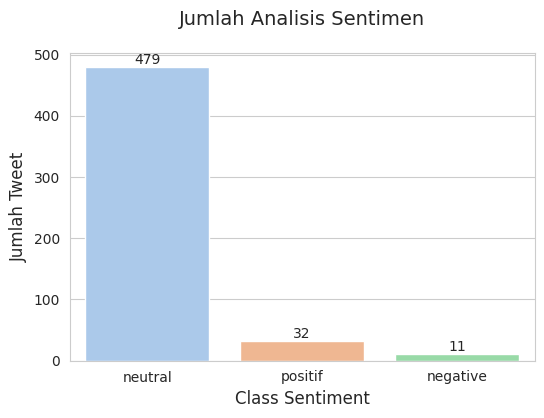

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and it contains a column named 'sentiment'
sentiment_count = data['sentiment'].value_counts().reset_index()
sentiment_count.columns = ['sentiment', 'count']

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
# Assign 'sentiment' to hue and set legend to False
ax = sns.barplot(x='sentiment', y='count', hue='sentiment', data=sentiment_count, palette='pastel', dodge=False, legend=False)

plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

# Adding the count labels on top of the bars
for i, count in enumerate(sentiment_count['count']):
    ax.text(i, count + 0.10, str(count), ha='center', va='bottom')

plt.show()


##wordcloud

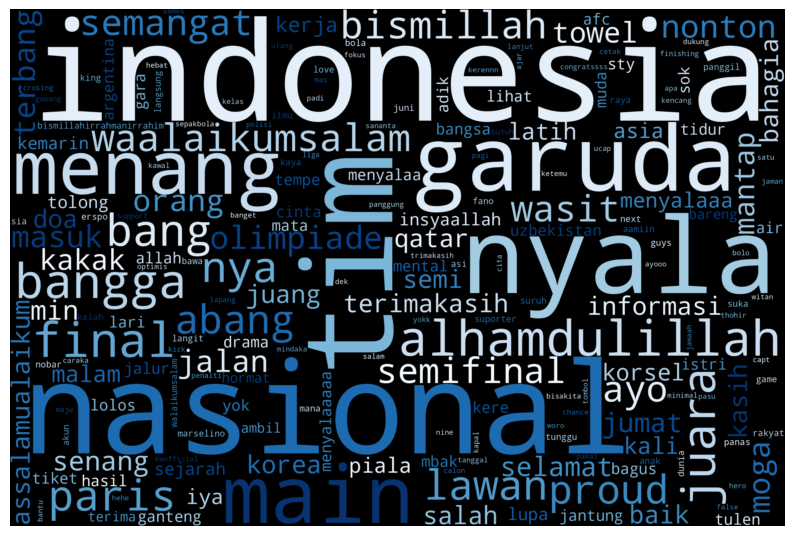

In [34]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(10,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ' '.join([tweets for tweets in data['stemming_data']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap="Blues_r",
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

In [31]:
df.head(1000)

,date,userName,text,case_folding,cleansing,normalisasi,remove_two_words,tokenize,Filtering/stopword removal,stemming_data,sentiment_score,sentiment
0,2024/04/29 10:16:56,ngui_sintan,Timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya ????????,timnas kali ini semua cogan semua ya,tim nasional kali ini semua cogan semua ya,tim nasional kali ini semua cogan semua,"[tim, nasional, kali, ini, semua, cogan, semua]","[tim, nasional, kali, cogan]",tim nasional kali cogan,0.0000,neutral
1,2024/04/29 12:28:06,agustiyaindahsariputri,Timnas Indonesia U-19 vs pra PON,timnas indonesia u-19 vs pra pon,timnas indonesia u vs pra pon,tim nasional indonesia kamu vs pra pon,tim nasional indonesia kamu pra pon,"[tim, nasional, indonesia, kamu, pra, pon]","[tim, nasional, indonesia, pra, pon]",tim nasional indonesia pra pon,0.0000,neutral
2,2024/04/29 14:36:48,dslsyabildumps_,uhuyyyy????,uhuyyyy????,uhuyyyy,uhuyyyy,uhuyyyy,[uhuyyyy],[uhuyyyy],uhuyyyy,0.0000,neutral
3,2024/04/29 14:57:33,rohadiiiiiii,Final : waalykumsalam ????,final : waalykumsalam ????,final waalykumsalam,final waalykumsalam,final waalykumsalam,"[final, waalykumsalam]","[final, waalykumsalam]",final waalykumsalam,0.0000,neutral
4,2024/04/29 16:31:02,ayunabilaaaaa,beyond proud???,beyond proud???,beyond proud,beyond proud,beyond proud,"[beyond, proud]","[beyond, proud]",beyond proud,0.4767,positif
...,...,...,...,...,...,...,...,...,...,...,...,...
517,2024/04/26 14:04:19,hi__k011,Apa itu finishing wkwkw,apa itu finishing wkwkw,apa itu finishing wkwkw,apa itu finishing wkwkw,apa itu finishing wkwkw,"[apa, itu, finishing, wkwkw]","[finishing, wkwkw]",finishing wkwkw,0.0000,neutral
518,2024/04/26 14:04:40,faidlft_,Menyala Timnaskuuu????????,menyala timnaskuuu????????,menyala timnaskuuu,menyala timnaskuuu,menyala timnaskuuu,"[menyala, timnaskuuu]","[menyala, timnaskuuu]",nyala timnaskuuu,0.0000,neutral
519,2024/04/26 14:05:14,tubagus_aj,Gilaaaaaaaaa ??????,gilaaaaaaaaa ??????,gilaaaaaaaaa,gilaaaaaaaaa,gilaaaaaaaaa,[gilaaaaaaaaa],[gilaaaaaaaaa],gilaaaaaaaaa,0.0000,neutral
520,2024/04/26 14:05:15,effendyahmd_,"@bbitchess6 Kenapa ga manual aja mbak, ambil a...","@bbitchess6 kenapa ga manual aja mbak, ambil a...",kenapa ga manual aja mbak ambil air trus cip...,kenapa tidak manual saja mbak ambil air terus ...,kenapa tidak manual saja mbak ambil air terus ...,"[kenapa, tidak, manual, saja, mbak, ambil, air...","[manual, mbak, ambil, air, cipratin, mata, pak...",manual mbak ambil air cipratin mata pakai tangan,0.0000,neutral


In [32]:
df.to_csv("06_data_result.csv", index=False)